# *Importing dataset and visualizing the first few rows of data*
The first step in our EDA is to view what the data might look like. The first 10 rows of data shows us that already there are missing data especially for the column Humidity sensor.

In [21]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import requests
import os
import pandas as pd

DB_PATH = 'data/agri.db'

def get_connection():
    return sqlite3.connect(DB_PATH)

def fetch_data():
    conn = get_connection()
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    table_name = pd.read_sql(query, conn).iloc[0, 0]
    df = pd.read_sql(f"SELECT * FROM {table_name};", conn)
    conn.close()
    return df

df = fetch_data()
df.head(10)

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,NaN,454.0,937,1.82,4,161,64,201,6.1,28.150346
1,Zone_G,Herbs,VINE CROPS,Vegetative,-24.16,63.14,441.0,938,2.13,6,161,53,None,6.5,31.000000
2,Zone_F,Herbs,herbs,maturity,23.84,NaN,562.0,1246,1.21,8,228,79,292,6.4,26.000000
3,Zone_G,Herbs,fruiting vegetables,Vegetative,22.61,NaN,651.0,1346,1.96,6,None,53 ppm,289,6.6,NaN
4,Zone_B,Vine Crops,LEAFY GREENS,seedling,22.88,NaN,144.0,812,2.76,5,61,19,168,5.5,28.000000
5,Zone_C,Vine Crops,FRUITING VEGETABLES,MATURITY,25.96,NaN,675.0,1338,1.75,8,227,53,258,6.2,23.092135
6,Zone_A,Leafy Greens,Vine Crops,Maturity,NaN,NaN,514.0,1103,1.14,8,174,62,217,5.5,35.000000
7,Zone_G,Herbs,Leafy Greens,Maturity,20.16,NaN,317.0,1133,1.52,10,None,None,277,5.8,39.611156
8,Zone_G,Herbs,Leafy Greens,Maturity,20.16,NaN,317.0,1133,1.52,10,None,None,277,5.8,39.611156
9,Zone_B,Vine Crops,Vine Crops,MATURITY,25.59,NaN,435.0,845,2.07,8,150,70,210,5.3,27.835062


An overview of the raw dataset shows us statistics for the numerical data. We can see half of the dataset is cateogrical and the other half numerical. As seen before the Humidity sensor has only less than a third of entries. 

In [22]:
print(f"Data shape: {df.shape}")
df.info()
df.describe()

Data shape: (57489, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 

,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),pH Sensor,Water Level Sensor (mm)
count,48800.000000,18622.000000,53211.000000,57489.000000,57489.000000,57489.000000,57489.000000,48847.000000
mean,22.138201,69.243535,397.841668,1083.376576,1.624435,6.580842,6.021446,25.716878
std,7.556981,5.725973,222.923860,172.570351,0.415535,1.145534,0.400251,5.815294
min,-28.570000,59.220000,-799.000000,799.000000,-0.250000,3.000000,3.800000,10.001955
25%,22.140000,64.340000,257.000000,950.000000,1.360000,6.000000,5.800000,21.313361
50%,23.210000,68.700000,403.000000,1071.000000,1.650000,7.000000,6.000000,26.000000
75%,24.350000,74.117500,553.000000,1178.000000,1.900000,7.000000,6.300000,30.000000
max,28.750000,81.140000,800.000000,1500.000000,3.440000,11.000000,7.800000,39.998717


# *Plotting charts and heatmaps*
##### 1. Next we plot histograms for all the numerical data and bar plots for all categorical data. Upon doing so I realised that some numerical data had entries that were string type and were wrongly classified as categorical. These columns are treated in the below cell to properly view their correlation in the plots:
##### 2. We then see from the heat matrix that Nutrient N and Nutrient P are highly positively correlated, while Nutrient K and Humidity seem to have strong negative correlation. 

## Main changes to the dataset:
##### a.) Change labels of Plant Type and Plant Stage to lower case 
##### b.) Remove 'ppm' in the string entries of Nutrient P Sensor (ppm) and Nutrient K Sensor (ppm) and change the 2 features to float



In [23]:
# Implement a.)
df['Plant Type'] = df['Plant Type'].str.lower()
df['Plant Stage'] = df['Plant Stage'].str.lower()
# Display all unique labels for the feature Nutrient P Sensor (ppm) if it is not a number:
print(df['Nutrient P Sensor (ppm)'].unique())
# Implement b.)
df['Nutrient N Sensor (ppm)'] = df['Nutrient N Sensor (ppm)'].apply(lambda x: float(x.replace('ppm', '').strip()) if pd.notnull(x) and 'ppm' in x else x)
df['Nutrient N Sensor (ppm)'] = df['Nutrient N Sensor (ppm)'].apply(lambda x: float(x) if pd.notnull(x) else x)

df['Nutrient P Sensor (ppm)'] = df['Nutrient P Sensor (ppm)'].apply(lambda x: float(x.replace('ppm', '').strip()) if pd.notnull(x) and 'ppm' in x else x)
df['Nutrient P Sensor (ppm)'] = df['Nutrient P Sensor (ppm)'].apply(lambda x: float(x) if pd.notnull(x) else x)

df['Nutrient K Sensor (ppm)'] = df['Nutrient K Sensor (ppm)'].apply(lambda x: float(x.replace('ppm', '').strip()) if pd.notnull(x) and 'ppm' in x else x)
df['Nutrient K Sensor (ppm)'] = df['Nutrient K Sensor (ppm)'].apply(lambda x: float(x) if pd.notnull(x) else x)
# # Check unique values again
# print(df['Nutrient N Sensor (ppm)'].unique())
# print(df['Nutrient P Sensor (ppm)'].unique())
# print(df['Nutrient K Sensor (ppm)'].unique())

['64' '53' '79' '53 ppm' '19' '62' None '70' '52' '55' '20' '50' '72' '26'
 '41' '32' '60' '63' '37' '80' '47' '23' '22' '74' '28' '34' '50 ppm' '69'
 '76' '68' '27' '75' '54' '77' '46' '66' '57' '61' '71' '58' '45' '48'
 '36' '65' '56' '51' '67' '44' '30' '43' '40' '73' '33' '35' '42' '31'
 '24' '39' '59' '38' '49' '21' '78' '25' '29' '64 ppm' '73 ppm' '56 ppm'
 '65 ppm' '34 ppm' '61 ppm' '63 ppm' '33 ppm' '71 ppm' '29 ppm' '54 ppm'
 '43 ppm' '77 ppm' '31 ppm' '66 ppm' '36 ppm' '46 ppm' '52 ppm' '68 ppm'
 '44 ppm' '59 ppm' '76 ppm' '55 ppm' '22 ppm' '67 ppm' '39 ppm' '58 ppm'
 '57 ppm' '24 ppm' '60 ppm' '30 ppm' '42 ppm' '38 ppm' '20 ppm' '37 ppm'
 '49 ppm' '75 ppm' '41 ppm' '69 ppm' '47 ppm' '62 ppm' '79 ppm' '28 ppm'
 '21 ppm' '70 ppm' '23 ppm' '35 ppm' '72 ppm' '45 ppm' '48 ppm' '40 ppm'
 '32 ppm' '78 ppm' '26 ppm']


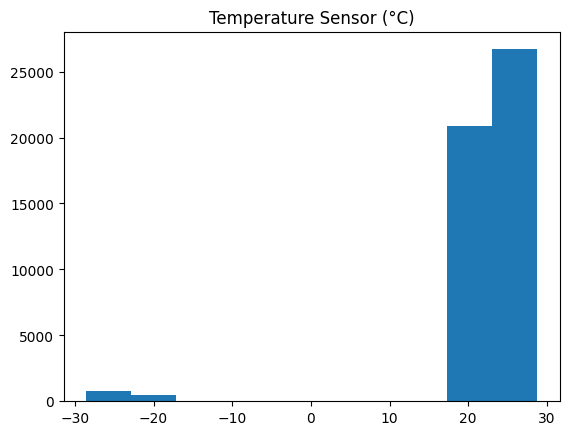

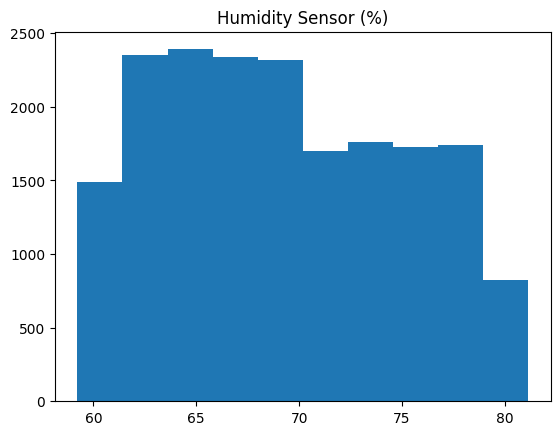

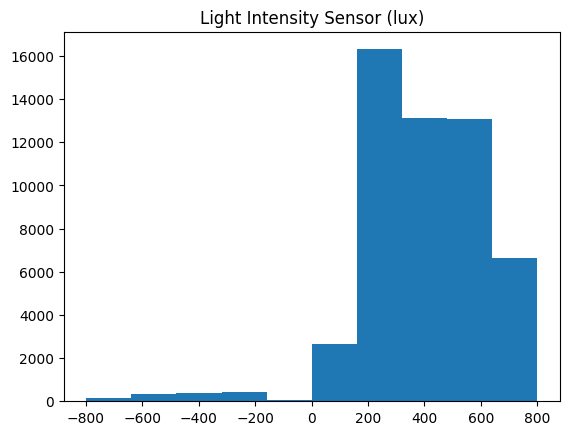

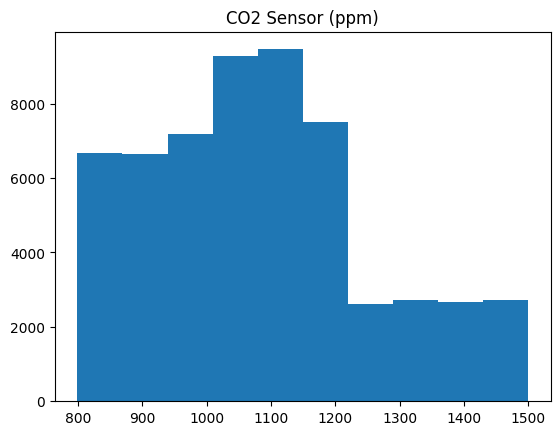

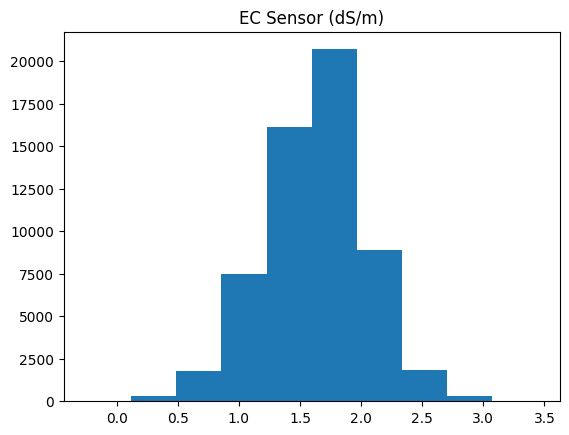

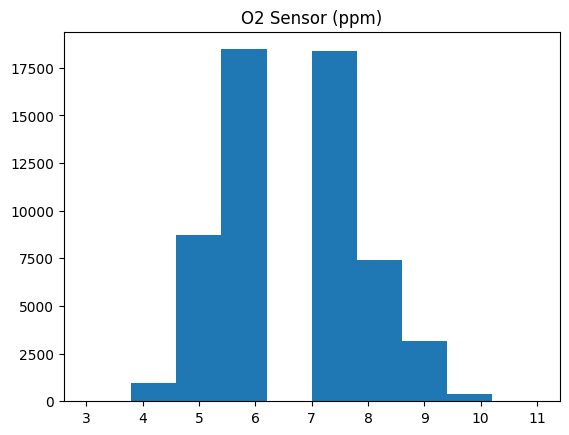

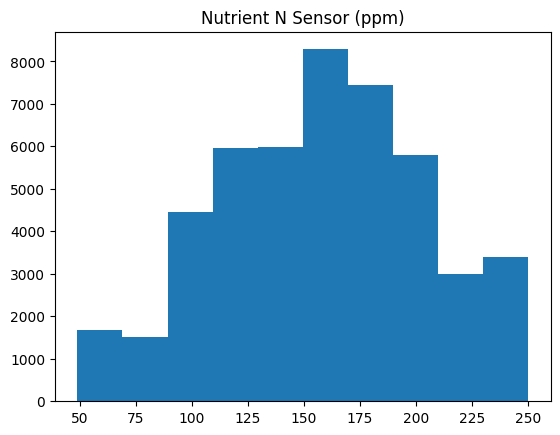

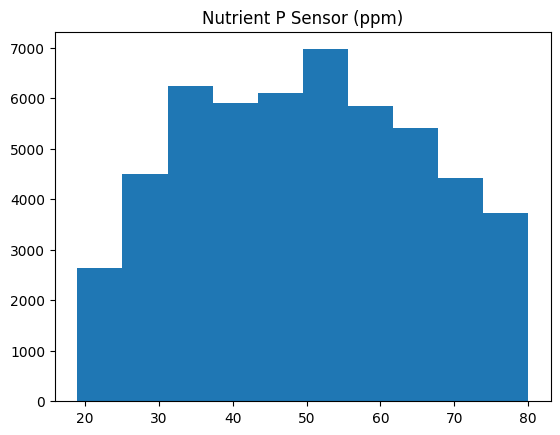

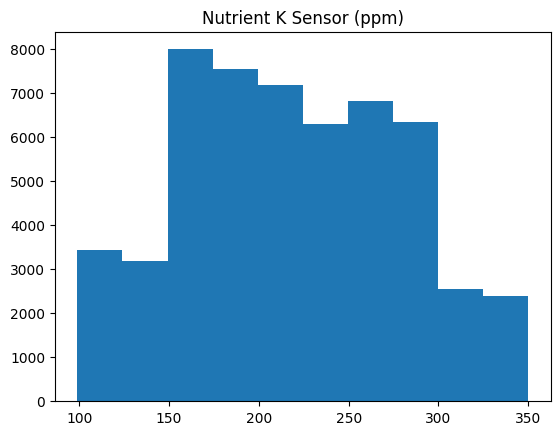

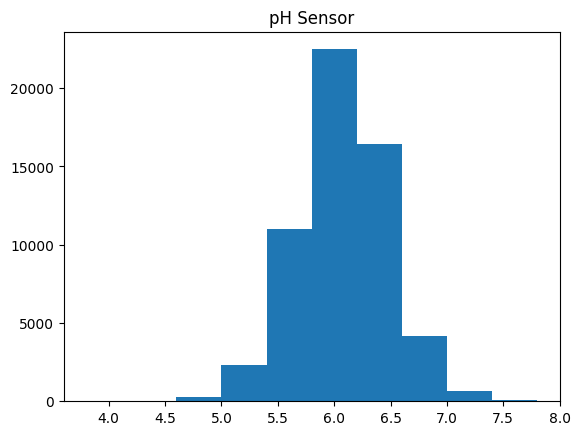

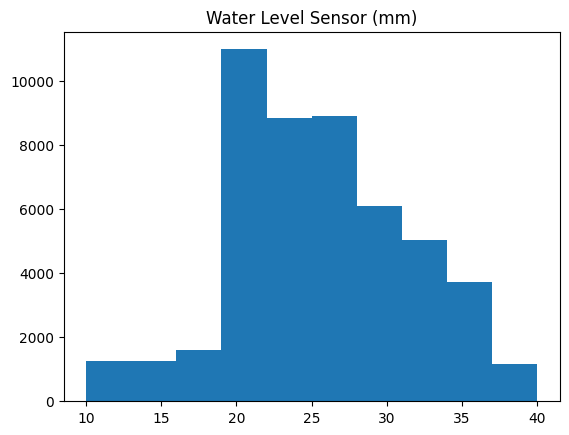

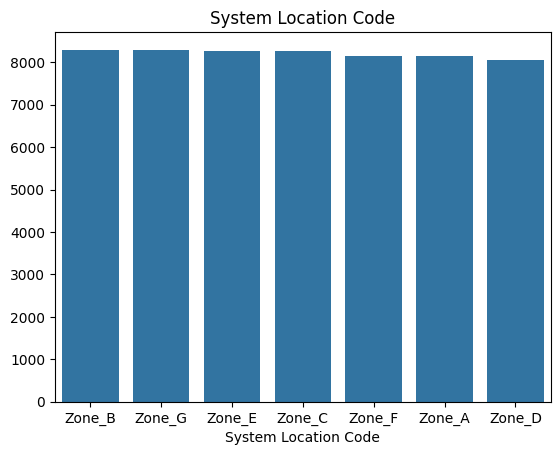

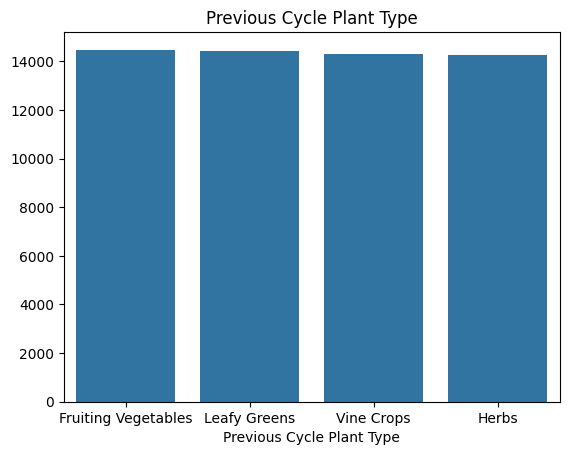

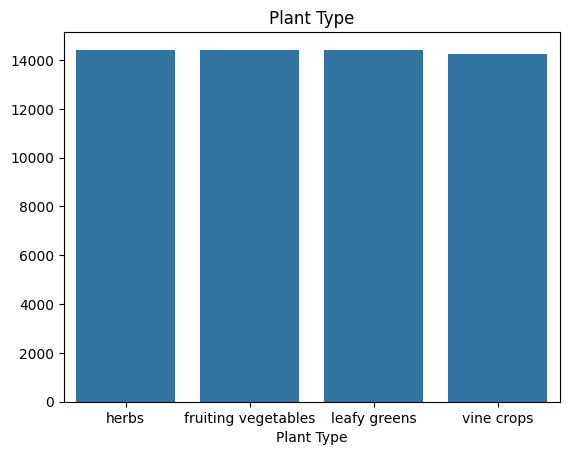

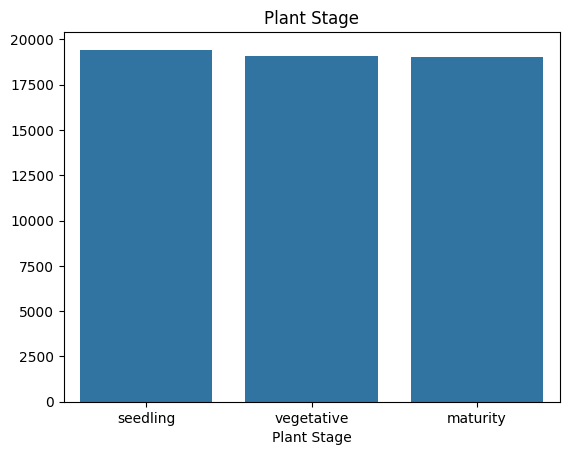

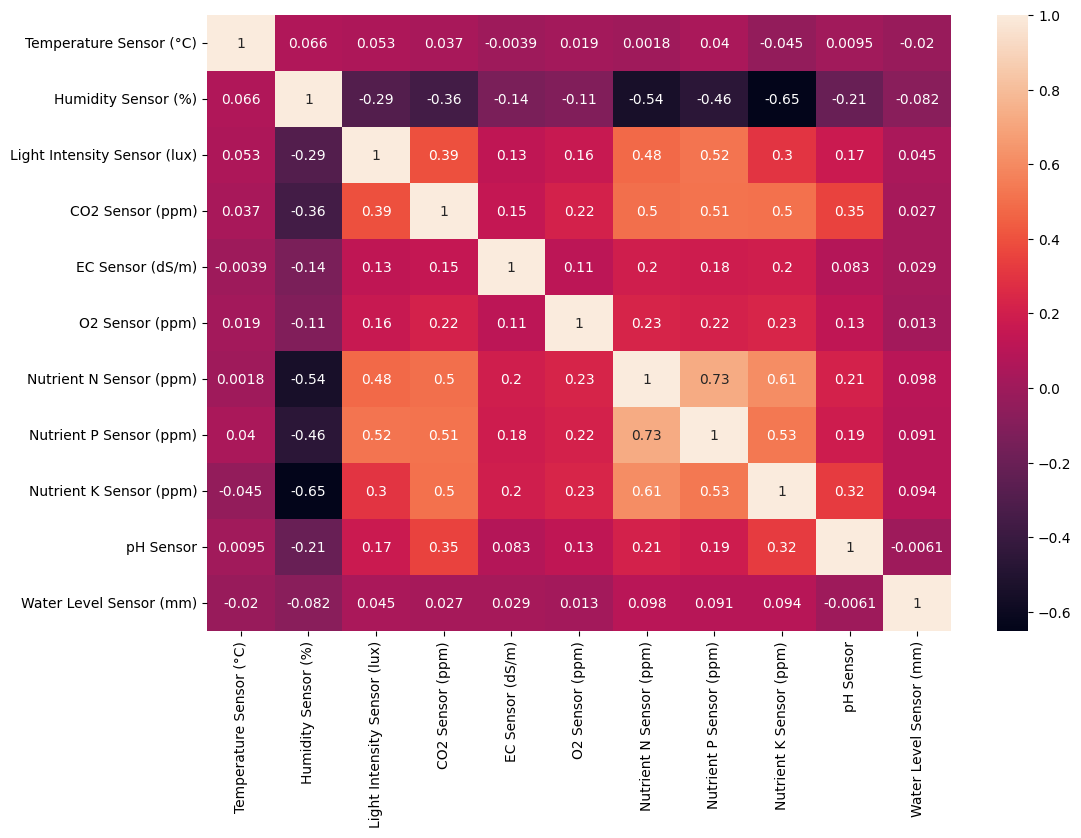

In [24]:
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(exclude=['number'])
for i in df_num.columns: #Plot histograms for all numeric columns except 'index'
    if i == 'index':
        continue
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
for i in df_cat.columns: #Plot bar plots for all categorical columns
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts().values) 
    plt.title(i)
    plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True)
plt.show()

# #Unique values in 'age'
# print(df['age'].unique())

# *Analyzing specific Variables*
## **Temperature Sensor (°C)**
##### Firstly we note that the Teperature Sensor readings have negative values. Let us take a closer look if the negative values have certain correlation with our target labels. We cam see that the box plots for the negative and positive data are somewhat symmetric.

##### Upon looking at the heat map, we do not see any cells with a significant change in values as compared to the heatmap with the full data. We can conclude that there is no significant difference between the negative and positive Temperature valued data apart from their signs. We can opt to take the absolute value of the negative temperature values and test out model performance. 

Number of negative Temperature Sensor (°C) values: 1252


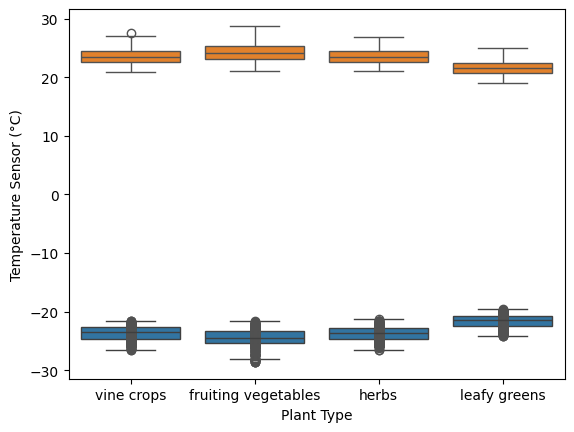

<Axes: >

<Figure size 1200x800 with 0 Axes>

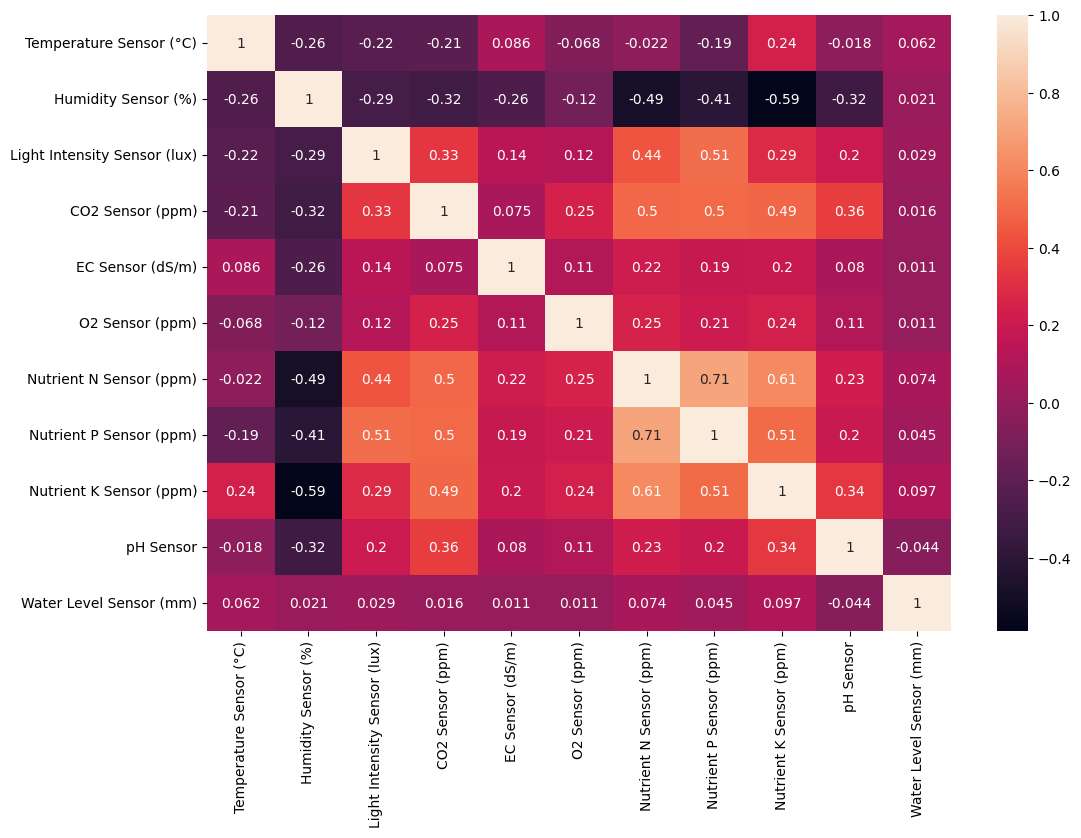

In [25]:
# Plotting distribution of negative Temperature Sensor (°C) values against the Plant Type
sns.boxplot(x='Plant Type', y='Temperature Sensor (°C)', data=df[df['Temperature Sensor (°C)'] < 0])
print('Number of negative Temperature Sensor (°C) values:', len(df[df['Temperature Sensor (°C)'] < 0]))
# Plot box plot of Temperature Sensor (°C) against Plant Type
sns.boxplot(x='Plant Type', y='Temperature Sensor (°C)', data=df)
plt.show()
# df filtererd to rows which have Temperature Sensor (°C) < 0
plt.figure(figsize=(12, 8))
df_negative_Temperature = df[df['Temperature Sensor (°C)'] < 0]
df_positive_Temperature = df[df['Temperature Sensor (°C)'] > 0]
# Show heat map of data where Temperature Sensor (°C) < 0
plt.figure(figsize=(12, 8)) 
df_negative_Temperature_num = df_negative_Temperature.select_dtypes(include=['number'])
sns.heatmap(df_negative_Temperature_num.corr(), annot=True)

## **Light Intensity Sensor**
##### We do the same for the feature Light Intensity Sensor and we get a similar plot and heatmap. However we see that for the negative Light Intensity Sensor (lux) values, it seems like there is strong correlation with Nutrient P sensor. This might be due to an anomaly that caused both the light sensor to malfunction (linearly) and level of Nutrient P to intensify. We have limited data to draw a conclusion. 

##### We can opt to take the absolute values of Light Intensity Sensor (lux) just as we did for Temperature Sensor

##### We can also see from the distribution plot of Temperature Sensor that there is no difference between the shapes between that of the original dataset and that of only the negative Light Intensity values. We can conclude that there might have been a mistake in inputting a negative sign in for the negative Light sensor values.

Number of negative Light Intensity Sensor (lux) values: 1385


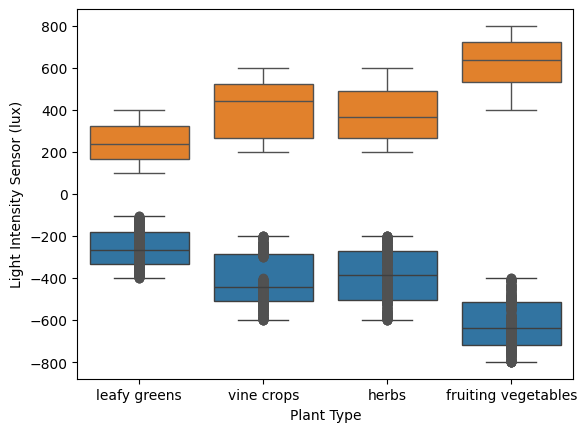

<Figure size 1200x800 with 0 Axes>

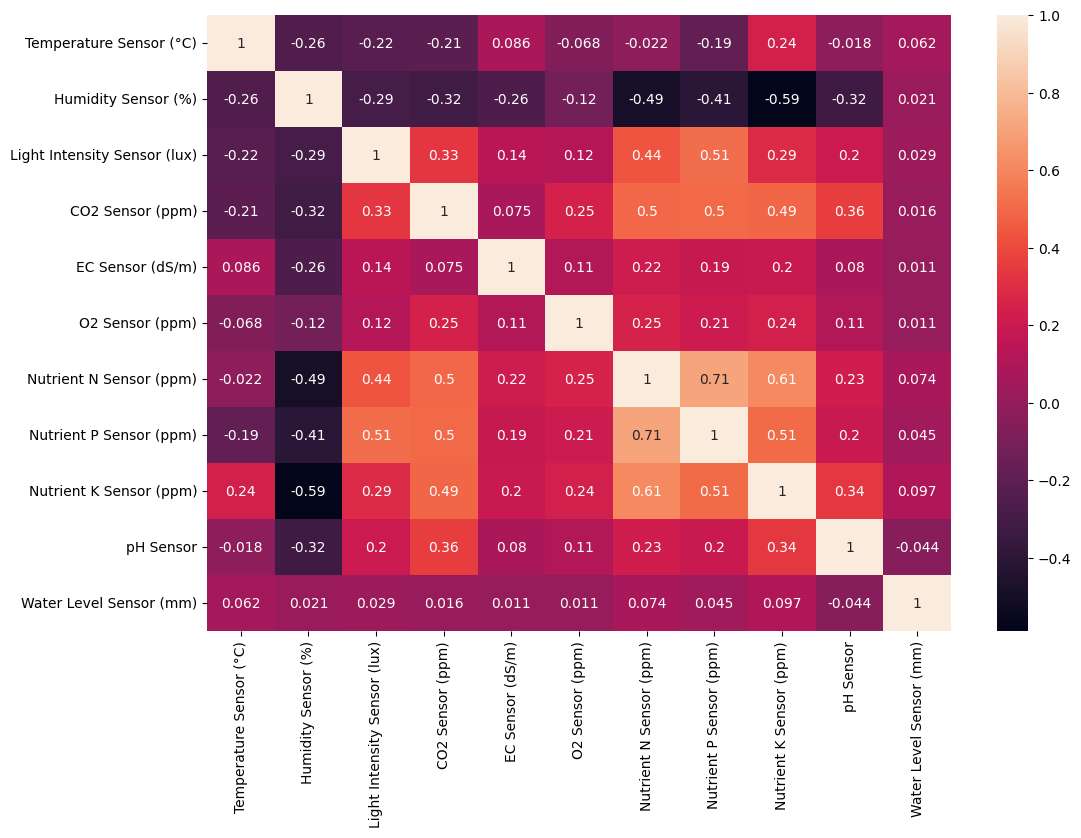

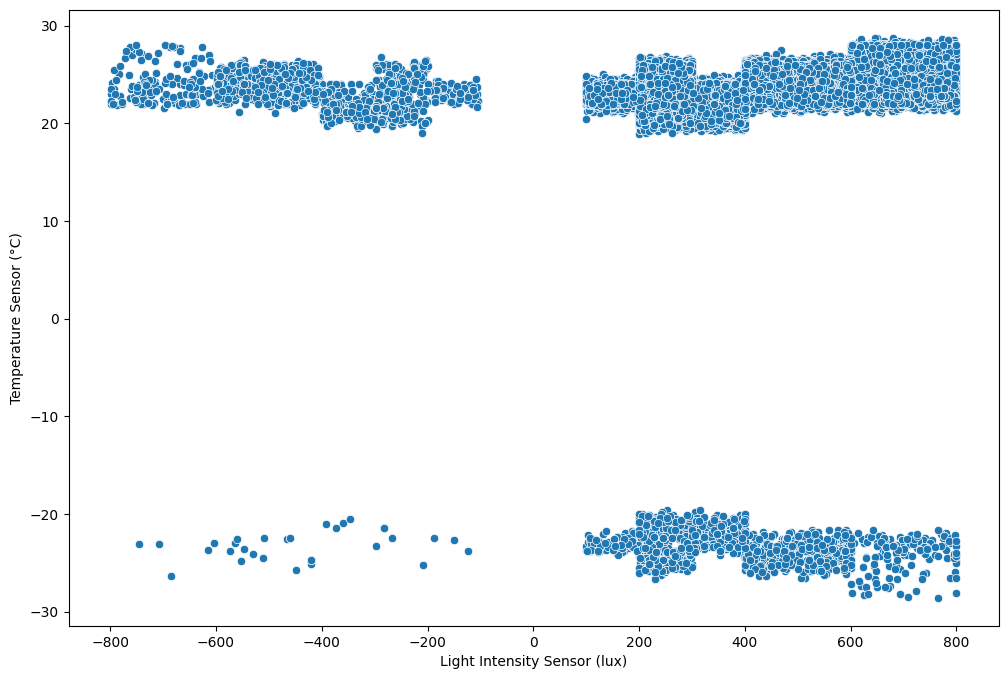

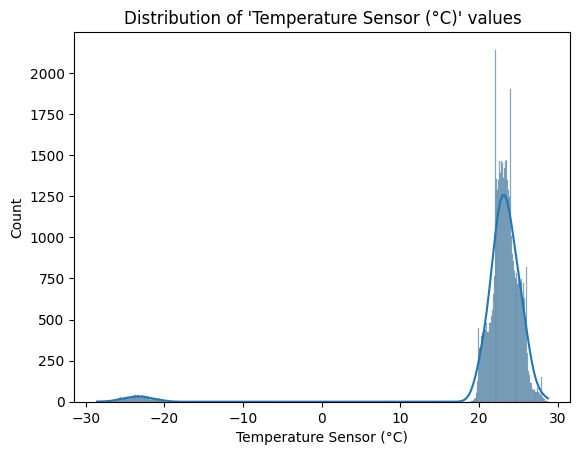

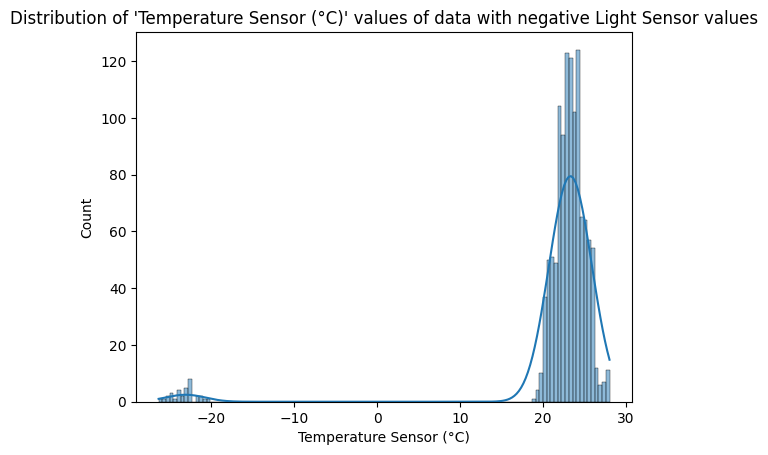

In [26]:
'''
Analysing shape of negative Light Sensor valued data and its heatmap
'''
# Plotting distribution of negative Light Intensity Sensor (lux) values against the Plant Type
sns.boxplot(x='Plant Type', y='Light Intensity Sensor (lux)', data=df[df['Light Intensity Sensor (lux)'] < 0])
print('Number of negative Light Intensity Sensor (lux) values:', len(df[df['Light Intensity Sensor (lux)'] < 0]))
# Plot box plot of Light Intensity Sensor (lux) against Plant Type
sns.boxplot(x='Plant Type', y='Light Intensity Sensor (lux)', data=df)
plt.show()
# df filtererd to rows which have Light Intensity Sensor (lux) < 0
plt.figure(figsize=(12, 8))
df_negative_Light = df[df['Light Intensity Sensor (lux)'] < 0]
# Show heat map of data where Light Intensity Sensor (lux) < 0
plt.figure(figsize=(12, 8)) 
df_negative_Light_num = df_negative_Temperature.select_dtypes(include=['number'])
sns.heatmap(df_negative_Temperature_num.corr(), annot=True)

'''
Analysing correlation between negative Light Sensor valued data and Temperature Sensor (°C) values
'''
# Distribtion of Temperature Sensor (°C) against Light Intensity Sensor (lux)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Light Intensity Sensor (lux)', y='Temperature Sensor (°C)', data=df)
plt.show()
# Distribution of Temperature Sensor (°C) for original df
sns.histplot(df['Temperature Sensor (°C)'], kde=True)
plt.title("Distribution of 'Temperature Sensor (°C)' values")
plt.show()
# Distribution of Temperature Sensor (°C) for data with negative Light Sensor values
sns.histplot(df_negative_Light['Temperature Sensor (°C)'], kde=True)
plt.title("Distribution of 'Temperature Sensor (°C)' values of data with negative Light Sensor values")
plt.show()



# 

## *O2 Sensor*
##### We can see that there is a gap in the o2 sensor value. Let us view the plot of Temperature against O2 Sensor as well as a box plot of O2 Sensor values with respect to the different Plant Types.

##### For the plot of Temperature Sensor values at different O2 Sensor values (Real valued), the statistics do not differ much. We can do a basic 

array([ 4,  8,  6,  5, 10,  7,  9,  3, 11])

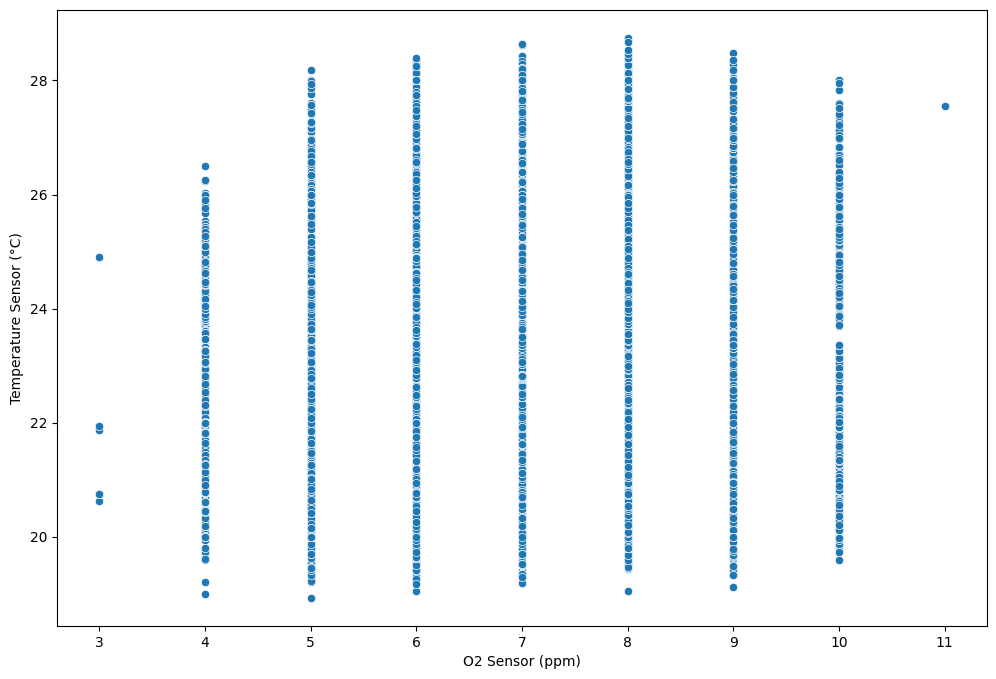

In [27]:
# Import ttest_ind from scipy.stats
from scipy.stats import ttest_ind
# Plot Temperature Sensor (°C) against O2 Sensor (%)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='O2 Sensor (ppm)', y='Temperature Sensor (°C)', data=df_positive_Temperature)
# Display statistics for Temperature Sensor (°C) for the different O2 Sensor (%) values
# df_positive_Temperature.groupby('O2 Sensor (ppm)')['Temperature Sensor (°C)'].describe()
# T-test to see if the different O2 Sensor (%) values have a significant effect on the Temperature Sensor (°C)
# # Generate a n by n matrix of t values for different O2 Sensor (ppm) values
# o2_values = df_positive_Temperature['O2 Sensor (ppm)'].unique()
# n = len(o2_values)
# t_matrix = np.zeros((n, n))

# for i in range(n):
#     for j in range(n):
        
#         group1 = df_positive_Temperature[df_positive_Temperature['O2 Sensor (ppm)'] == o2_values[i]]['Temperature Sensor (°C)']
#         group2 = df_positive_Temperature[df_positive_Temperature['O2 Sensor (ppm)'] == o2_values[j]]['Temperature Sensor (°C)']
#         t_stat, _ = ttest_ind(group1, group2, nan_policy='omit')
#         t_matrix[i, j] = t_stat
#         # else:
#         #     t_matrix[i, j] = np.nan  # Fill diagonal with NaN as t-test is not applicable for same groups

# # Display the t values in a DataFrame
# t_matrix_df = pd.DataFrame(t_matrix, index=o2_values, columns=o2_values)
# t_matrix_df

# Sorted unique values of O2 Sensor (%)
o2_values = df_positive_Temperature['O2 Sensor (ppm)'].unique()
o2_values

# *Duplicate Data*
##### Lastly we check if there were any duplicate data. We find that we have about 7500 duplciates out of the original 57000, which is significant.

In [28]:
# Checking for duplicate data in the df dataset
duplicate_rows = df[df.duplicated()]
duplicate_rows_count = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_rows_count}")
# Group duplicate consecutively and display them:
consecutive_duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).reset_index(drop=True)
consecutive_duplicates.head(10)

Number of duplicate rows in the dataset: 7489


,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,-25.33,NaN,672.0,1247,1.61,7,150.0,60.0,278.0,6.8,29.010823
1,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,-25.33,NaN,672.0,1247,1.61,7,150.0,60.0,278.0,6.8,29.010823
2,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,21.84,NaN,660.0,1421,1.99,9,240.0,NaN,300.0,6.3,12.495451
3,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,21.84,NaN,660.0,1421,1.99,9,240.0,NaN,300.0,6.3,12.495451
4,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,22.37,NaN,644.0,1236,1.43,7,150.0,71.0,202.0,6.5,29.388804
5,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,22.37,NaN,644.0,1236,1.43,7,150.0,71.0,202.0,6.5,29.388804
6,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,22.60,63.7,777.0,1174,1.77,6,213.0,NaN,263.0,6.3,NaN
7,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,22.60,63.7,777.0,1174,1.77,6,213.0,NaN,263.0,6.3,NaN
8,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,22.72,NaN,711.0,1339,1.65,8,169.0,67.0,214.0,6.5,NaN
9,Zone_A,Fruiting Vegetables,fruiting vegetables,maturity,22.72,NaN,711.0,1339,1.65,8,169.0,67.0,214.0,6.5,NaN
